<a href="https://colab.research.google.com/github/akramfd12/Machine-Learning-Saudia-Used-Cars/blob/main/ML_Saudi_Arabia_Used_Cars.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Saudi Arabia Used Cars**

# Business Problem


Latar Belakang  Masalah

Harga mobil bekas sangat bervariasi tergantung model, tahun, mileage, dan lokasi. Penjual sering memasang harga terlalu tinggi atau terlalu rendah, sehingga menyebabkan mobil tidak laku, kerugian, dan pengalaman pengguna yang buruk.

Ketidakseragaman harga ini menyebabkan ketidakstabilan di pasar.

Bagaimana perusahaan dapat memperkirakan harga wajar sebuah mobil bekas secara akurat, cepat, dan konsisten untuk meningkatkan efisiensi transaksi dan mengurangi kerugian?

Solusi

Dari masalah ini maka perusahan membutuhkan model machine learning untuk memprediksi harga mobil harga otomatis berdasarkan data data yang tersedia yang dapat memiliki impact positif ke perusahaan

# Import Library

In [ ]:
pip install -q catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 8.7 MB/s eta 0:00:00


In [ ]:
pip install -q xgboost

In [ ]:
pip install -q optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 404.7/404.7 kB 10.3 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from catboost import CatBoostRegressor,Pool
from sklearn.model_selection import (
    train_test_split,
)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
import scipy.stats as stats
from scipy.stats import ks_2samp
import optuna


# Import Data

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
df = pd.read_csv("/content/gdrive/MyDrive/Capstone/Module2/data_saudi_used_cars.csv")
df

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Negotiable,Price
0,Corolla,Abha,Toyota,Manual,Saudi,Standard,2013,1.4,421000,True,0
1,Yukon,Riyadh,GMC,Automatic,Saudi,Full,2014,8.0,80000,False,120000
2,Range Rover,Riyadh,Land Rover,Automatic,Gulf Arabic,Full,2015,5.0,140000,False,260000
3,Optima,Hafar Al-Batin,Kia,Automatic,Saudi,Semi Full,2015,2.4,220000,False,42000
4,FJ,Riyadh,Toyota,Automatic,Saudi,Full,2020,4.0,49000,True,0
...,...,...,...,...,...,...,...,...,...,...,...
5619,X-Trail,Jeddah,Nissan,Automatic,Saudi,Standard,2018,2.5,78794,False,68000
5620,Altima,Jeddah,Nissan,Automatic,Saudi,Semi Full,2020,2.5,58000,True,0
5621,Yukon,Dammam,GMC,Automatic,Saudi,Full,2016,5.3,48000,False,145000
5622,RX,Dammam,Lexus,Automatic,Gulf Arabic,Full,2016,2.5,81000,False,154000


Features
1. Type: Jenis mobil bekas.
2. Region: Wilayah atau daerah tempat mobil bekas tersebut ditawarkan untuk dijual.
3. Make: Merek atau perusahaan pembuat mobil.
4. Gear_Type: Jenis transmisi mobil (manual atau otomatis).
5. Origin: Asal mobil
6. Year: Tahun pembuatan mobil.
7. Engine_Size: Ukuran mesin mobil.
8. Mileage: Jarak tempuh mobil.
9. Negotiable: Bernilai True jika harga mobil adalah 0, artinya harga akan dinegosiasikan.
10. Price: Harga mobil bekas.


# Cek Data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5624 entries, 0 to 5623
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Type         5624 non-null   object 
 1   Region       5624 non-null   object 
 2   Make         5624 non-null   object 
 3   Gear_Type    5624 non-null   object 
 4   Origin       5624 non-null   object 
 5   Options      5624 non-null   object 
 6   Year         5624 non-null   int64  
 7   Engine_Size  5624 non-null   float64
 8   Mileage      5624 non-null   int64  
 9   Negotiable   5624 non-null   bool   
 10  Price        5624 non-null   int64  
dtypes: bool(1), float64(1), int64(3), object(6)
memory usage: 445.0+ KB


In [ ]:
df.describe()

,Year,Engine_Size,Mileage,Price
count,5624.000000,5624.000000,5.624000e+03,5624.000000
mean,2014.101885,3.295430,1.509234e+05,53074.058144
std,5.791606,1.515108,3.828360e+05,70155.340614
min,1963.000000,1.000000,1.000000e+02,0.000000
25%,2012.000000,2.000000,3.800000e+04,0.000000
50%,2016.000000,3.000000,1.030000e+05,36500.000000
75%,2018.000000,4.500000,1.960000e+05,72932.500000
max,2022.000000,9.000000,2.000000e+07,850000.000000


In [ ]:
#Cek Duplikat
df.duplicated().sum()

np.int64(4)

In [ ]:
#Cek Data Null
df.isna().sum()

,0
Type,0
Region,0
Make,0
Gear_Type,0
Origin,0
Options,0
Year,0
Engine_Size,0
Mileage,0
Negotiable,0


In [ ]:
df.groupby("Negotiable").count()

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Price
Negotiable,,,,,,,,,,
False,3828,3828,3828,3828,3828,3828,3828,3828,3828,3828
True,1796,1796,1796,1796,1796,1796,1796,1796,1796,1796


In [ ]:
df["Origin"].unique()

array(['Saudi', 'Gulf Arabic', 'Other', 'Unknown'], dtype=object)

In [ ]:
df["Region"].unique()

array(['Abha', 'Riyadh', 'Hafar Al-Batin', 'Aseer', 'Makkah', 'Dammam',
       'Yanbu', 'Al-Baha', 'Jeddah', 'Hail', 'Khobar', 'Al-Ahsa', 'Jazan',
       'Al-Medina', 'Al-Namas', 'Tabouk', 'Taef', 'Qassim', 'Arar',
       'Jubail', 'Sabya', 'Al-Jouf', 'Najran', 'Wadi Dawasir', 'Qurayyat',
       'Sakaka', 'Besha'], dtype=object)

In [ ]:
df.columns

Index(['Type', 'Region', 'Make', 'Gear_Type', 'Origin', 'Options', 'Year',
       'Engine_Size', 'Mileage', 'Negotiable', 'Price'],
      dtype='object')

In [ ]:
df["Price"].describe()


,Price
count,5624.000000
mean,53074.058144
std,70155.340614
min,0.000000
25%,0.000000
50%,36500.000000
75%,72932.500000
max,850000.000000


In [ ]:
df["Price"].skew()

np.float64(3.0201625514879993)

# Penjelasan data


Data yang ada merupakan penjualan mobil bekas yang ada di Arab dengan daerah penjualan juga berada di Arab Saudi, kemudian untuk type dan merk juga bervariasi mulai dari Eropa, US, dan Asia. Tahun mobil juga bervariasi ada yang umur mobil tersebut dari yang paling muda 62 tahun sampai 4 tahun, di data ini juga menunjukan ada nya jarak tempuh sesuai dengan pemakaian, kemudian ada options yang merupakan kelengkapan fitur mobil, ada kolom negotiable nya juga yang berarti apakah mobil tersebut bisa di nego atau tidak, yang terakhir dan paling penting ada harga mobil yang sangat bervariasi mulai dari 0 - 850000


# Target & Evaluasi Metrik
Target

Dari data kita akan menggunakan Price sebagai data target untuk memprediksi harga

Metrik

Mean Absolute Error : Rata-rata jarak mutlak (absolute) antara nilai asli dan prediksi.

Mean Squared Error : Rata-rata kuadrat error

Root Mean Squared Error : Rata rata kesalahan prediksi tapi menghukum kesalahan besar

R² Score: Mengukur seberapa baik model

# Clean Data & Feature Engineering

# Clean Data
Melakukan Drop duplikat,Filter data, karna ingin prediksi harga mobil yang harganya sudah tertera, jika yang negotiable masuk maka akan banyak data yang harganya tidak ada atau 0 sehingga ketika prediksi akurasinya menjadi kecil



In [ ]:
df_clean = df[df["Negotiable"] == False]
df_clean = df_clean.drop_duplicates()
df_clean = df_clean[df_clean["Price"] >= 500]

df_clean

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Negotiable,Price
1,Yukon,Riyadh,GMC,Automatic,Saudi,Full,2014,8.0,80000,False,120000
2,Range Rover,Riyadh,Land Rover,Automatic,Gulf Arabic,Full,2015,5.0,140000,False,260000
3,Optima,Hafar Al-Batin,Kia,Automatic,Saudi,Semi Full,2015,2.4,220000,False,42000
5,CX3,Abha,Mazda,Automatic,Saudi,Semi Full,2019,2.0,25000,False,58000
6,Cayenne S,Riyadh,Porsche,Automatic,Saudi,Full,2012,4.8,189000,False,85000
...,...,...,...,...,...,...,...,...,...,...,...
5616,CX9,Qassim,Mazda,Automatic,Saudi,Full,2020,2.0,9500,False,132000
5618,Suburban,Riyadh,GMC,Automatic,Saudi,Full,2006,5.3,86000,False,50000
5619,X-Trail,Jeddah,Nissan,Automatic,Saudi,Standard,2018,2.5,78794,False,68000
5621,Yukon,Dammam,GMC,Automatic,Saudi,Full,2016,5.3,48000,False,145000


In [ ]:
df_clean["Price"].describe()


,Price
count,3823.000000
mean,78039.652629
std,72746.750486
min,500.000000
25%,35000.000000
50%,58000.000000
75%,94500.000000
max,850000.000000


In [ ]:
#Cek Outliers
Q1 = df_clean["Price"].quantile(0.25)
Q3 = df_clean["Price"].quantile(0.75)
IQR = Q3 - Q1

outliers = df_clean[(df_clean["Price"] < Q1 - 1.5*IQR) | (df_clean["Price"] > Q3 + 1.5*IQR)]
outliers.count()

,0
Type,259
Region,259
Make,259
Gear_Type,259
Origin,259
Options,259
Year,259
Engine_Size,259
Mileage,259
Negotiable,259


In [ ]:
#Mengurangi Efek Outlier
df_clean["Price"] = df_clean["Price"].clip(lower=df_clean["Price"].quantile(0.01),upper=df_clean["Price"].quantile(0.99))

# Feature Engineering

Menambahkan umur mobil tersebut dari tahun pembuatan

In [ ]:
df_clean["Car_Age"] = 2025 - df_clean["Year"]

Encode agar model dapat melihat pola lebih jelas

In [ ]:
df_clean["Options"].unique()

array(['Full', 'Semi Full', 'Standard'], dtype=object)

In [ ]:
#Options
df_clean["Is_Full_Option"] = (df_clean["Options"] == "Full").astype(int)
df_clean["Is_Semi_Full"] = (df_clean["Options"] == "Semi Full").astype(int)

In [ ]:
df_clean["Gear_Type"].unique()

array(['Automatic', 'Manual'], dtype=object)

In [ ]:
#Gear_Type
df_clean["Is_Auto"] = (df_clean["Gear_Type"] == "Automatic").astype(int)

In [ ]:
df_clean["Car_Age"].median()

9.0

In [ ]:
df_clean["Car_Age"].mean()

np.float64(10.149882291394192)

In [ ]:
df_clean["Price"].mean()

np.float64(77092.21773476327)

In [ ]:
df_clean["Price"].median()

58000.0

In [ ]:
df_clean[df_clean["Price"] > 100000].count()

,0
Type,856
Region,856
Make,856
Gear_Type,856
Origin,856
Options,856
Year,856
Engine_Size,856
Mileage,856
Negotiable,856


In [ ]:
df_clean["Price"].min()

1676.6

In [ ]:
df_clean["Price"].max()

384978.0

In [ ]:
df_clean["Price"].skew()


np.float64(2.2332144893086374)

# Model
Model menggunakan XGBoost dan Catboost dikarenakan untuk memprediksi harga mobil karena model berbasis pohon mampu menangani data numerik maupun kategorikal tanpa scaling, tahan terhadap outlier, dapat menangkap hubungan non-linear, dan beberapa di antaranya memiliki kemampuan menangani ketidakseimbangan data, sehingga cocok untuk karakteristik dataset ini.

# XGBoost

In [ ]:
#Drop kolom yang berkaitan agar tidak multicolar
df_filtered_xg = df_clean.drop(columns = ["Negotiable","Year","Options","Gear_Type"])

In [ ]:
df_filtered_xg.columns

Index(['Type', 'Region', 'Make', 'Origin', 'Engine_Size', 'Mileage', 'Price',
       'Car_Age', 'Is_Full_Option', 'Is_Semi_Full', 'Is_Auto'],
      dtype='object')

In [ ]:
df_filtered_xg

,Type,Region,Make,Origin,Engine_Size,Mileage,Price,Car_Age,Is_Full_Option,Is_Semi_Full,Is_Auto
1,Yukon,Riyadh,GMC,Saudi,8.0,80000,120000.0,11,1,0,1
2,Range Rover,Riyadh,Land Rover,Gulf Arabic,5.0,140000,260000.0,10,1,0,1
3,Optima,Hafar Al-Batin,Kia,Saudi,2.4,220000,42000.0,10,0,1,1
5,CX3,Abha,Mazda,Saudi,2.0,25000,58000.0,6,0,1,1
6,Cayenne S,Riyadh,Porsche,Saudi,4.8,189000,85000.0,13,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
5616,CX9,Qassim,Mazda,Saudi,2.0,9500,132000.0,5,1,0,1
5618,Suburban,Riyadh,GMC,Saudi,5.3,86000,50000.0,19,1,0,1
5619,X-Trail,Jeddah,Nissan,Saudi,2.5,78794,68000.0,7,0,0,1
5621,Yukon,Dammam,GMC,Saudi,5.3,48000,145000.0,9,1,0,1


# Encode

In [ ]:
#Encode kolom yang lain
category_encode = df_filtered_xg[["Type","Region","Make","Origin"]]
category_encode

,Type,Region,Make,Origin
1,Yukon,Riyadh,GMC,Saudi
2,Range Rover,Riyadh,Land Rover,Gulf Arabic
3,Optima,Hafar Al-Batin,Kia,Saudi
5,CX3,Abha,Mazda,Saudi
6,Cayenne S,Riyadh,Porsche,Saudi
...,...,...,...,...
5616,CX9,Qassim,Mazda,Saudi
5618,Suburban,Riyadh,GMC,Saudi
5619,X-Trail,Jeddah,Nissan,Saudi
5621,Yukon,Dammam,GMC,Saudi


In [ ]:
#Label Encoder
encoders = {}
for i in category_encode:
  le = LabelEncoder()
  df_filtered_xg[i] = le.fit_transform(df_filtered_xg[i])
  encoders[i] = le
encoders


{'Type': LabelEncoder(),
 'Region': LabelEncoder(),
 'Make': LabelEncoder(),
 'Origin': LabelEncoder()}

# Korelasi antar Feature


In [ ]:
#Cek Korelasi dengan data target
corr = df_filtered_xg.corr()
corr.sort_values("Price", ascending=False)

,Type,Region,Make,Origin,Engine_Size,Mileage,Price,Car_Age,Is_Full_Option,Is_Semi_Full,Is_Auto
Price,0.106506,0.014000,0.045439,-0.197216,0.319623,-0.118651,1.000000,-0.331108,0.343033,-0.091840,0.127629
Is_Full_Option,0.010574,-0.051813,0.017906,-0.166848,0.217798,-0.015842,0.343033,0.059469,1.000000,-0.479561,0.058674
Engine_Size,0.217928,-0.017550,-0.216838,-0.050117,1.000000,0.032295,0.319623,0.239786,0.217798,0.052829,0.086373
Is_Auto,0.034908,0.029128,-0.280437,-0.007604,0.086373,-0.087211,0.127629,-0.216017,0.058674,0.024051,1.000000
Type,1.000000,-0.007223,-0.141301,0.013456,0.217928,0.024134,0.106506,0.092326,0.010574,0.054407,0.034908
Make,-0.141301,-0.008237,1.000000,-0.002517,-0.216838,-0.013246,0.045439,-0.034921,0.017906,-0.057521,-0.280437
Region,-0.007223,1.000000,-0.008237,-0.032065,-0.017550,0.025773,0.014000,-0.083663,-0.051813,0.004979,0.029128
Is_Semi_Full,0.054407,0.004979,-0.057521,-0.013801,0.052829,0.037738,-0.091840,0.027722,-0.479561,1.000000,0.024051
Mileage,0.024134,0.025773,-0.013246,0.012221,0.032295,1.000000,-0.118651,0.178366,-0.015842,0.037738,-0.087211
Origin,0.013456,-0.032065,-0.002517,1.000000,-0.050117,0.012221,-0.197216,-0.007685,-0.166848,-0.013801,-0.007604


#Split Data


In [ ]:
#Memisahkan Prediktor dan Target sebelum train
X_filtered_xg = df_filtered_xg.drop(columns = "Price")
y_filtered_xg = df_filtered_xg["Price"]

In [ ]:
#Membagi train dan test
X_train_filtered_xg, X_test_filtered_xg, y_train_filtered_xg, y_test_filtered_xg = train_test_split(X_filtered_xg,
                                                                                                    y_filtered_xg,
                                                                                                    test_size = 0.2,
                                                                                                    random_state=42)

In [ ]:
X_train_filtered_xg.shape

(3058, 10)

In [ ]:
X_test_filtered_xg.shape

(765, 10)

# Train Model

In [ ]:
model_filtered_xg = XGBRegressor(n_estimators=1500 ,#Jumlah Tree
                                 learning_rate=0.05, #kontribusi tree
                                 random_state=42,
                                 subsample=0.8
                                 )
model_filtered_xg.fit(X_train_filtered_xg, y_train_filtered_xg)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.05, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=1500,
             n_jobs=None, num_parallel_tree=None, ...)

# Prediksi data train dan test

In [ ]:
y_train_predict_filtered_xg=model_filtered_xg.predict(X_train_filtered_xg)
y_test_predict_filtered_xg=model_filtered_xg.predict(X_test_filtered_xg)

In [ ]:
df_pred_xg = pd.DataFrame({
    "y_true": y_test_filtered_xg.values,
    "y_pred_base": y_test_predict_filtered_xg
})

df_pred_xg.head(10)

,y_true,y_pred_base
0,49000.0,57619.859375
1,35000.0,17337.041016
2,45000.0,43548.804688
3,117000.0,121998.078125
4,20000.0,30747.962891
5,105000.0,96573.210938
6,30000.0,64031.609375
7,18000.0,22046.492188
8,70000.0,57603.339844
9,120000.0,140016.109375


# Cek Feature Importance

In [ ]:
importance = model_filtered_xg.feature_importances_
feat_imp = pd.DataFrame({
    "feature": X_train_filtered_xg.columns,
    "importance": importance
}).sort_values("importance", ascending=False)

feat_imp

,feature,importance
7,Is_Full_Option,0.301544
6,Car_Age,0.181852
2,Make,0.174521
4,Engine_Size,0.159673
0,Type,0.047237
3,Origin,0.040856
9,Is_Auto,0.033114
5,Mileage,0.029460
8,Is_Semi_Full,0.016403
1,Region,0.015340


# Evaluasi Metrik

In [ ]:
mae_filtered_xg = mean_absolute_error(y_train_filtered_xg, y_train_predict_filtered_xg)
mse_filtered_xg = mean_squared_error(y_train_filtered_xg, y_train_predict_filtered_xg)
r2_filtered_xg = r2_score(y_train_filtered_xg, y_train_predict_filtered_xg)
rmse_filtered_xg = np.sqrt(mean_squared_error(y_train_filtered_xg, y_train_predict_filtered_xg))
print(f"MAE = {mae_filtered_xg}")
print(f"MSE = {mse_filtered_xg}")
print(f"r2 = {r2_filtered_xg}")
print(f"rmse = {rmse_filtered_xg}")

MAE = 1283.6932916255773
MSE = 4650090.097355209
r2 = 0.998937114888957
rmse = 2156.4067560075973


In [ ]:
mae_filtered_xg = mean_absolute_error(y_test_filtered_xg, y_test_predict_filtered_xg)
mse_filtered_xg = mean_squared_error(y_test_filtered_xg, y_test_predict_filtered_xg)
r2_filtered_xg = r2_score(y_test_filtered_xg, y_test_predict_filtered_xg)
rmse_filtered_xg = np.sqrt(mean_squared_error(y_test_filtered_xg, y_test_predict_filtered_xg))
print(f"MAE = {mae_filtered_xg}")
print(f"MSE = {mse_filtered_xg}")
print(f"r2 = {r2_filtered_xg}")
print(f"rmse = {rmse_filtered_xg}")

MAE = 14584.324638863358
MSE = 616757496.1890075
r2 = 0.8758908489037718
rmse = 24834.602799098833


# Cek Residu

Skew : 0.9206673813413443


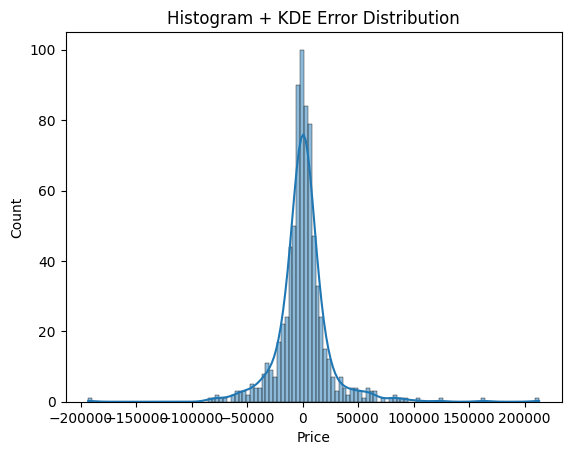

In [ ]:
errors = y_test_filtered_xg - y_test_predict_filtered_xg
skew_value = errors.skew()
print("Skew :", skew_value)

sns.histplot(errors, kde=True)
plt.title("Histogram + KDE Error Distribution")
plt.show()

#KS Test

In [ ]:
ks_stat, p_value = stats.ks_2samp(y_test_predict_filtered_xg, y_test_filtered_xg)
print("KS Statistic:", ks_stat)
print("P-Value:", p_value)

KS Statistic: 0.058823529411764705
P-Value: 0.14169795760229584


#Kesimpulan Dengan XGBoost
Evaluasi Metrik

Dilihat dari evaluasi Metrik model XGBoost mengalami over fit terlihat dari perbedaan evaluasi metrik antara train dan test yang cukup besar

Skew Data

Walaupun masih aman model terlihat positive skew sehingga model cenderung memprediksi lebih rendah dari harga sebenarnya

KS Test

Terlihat error atau residual mengikuti distribusi yang berarti distribusi prediksi dan actual mirip

# Catboost


In [ ]:
#Drop kolom yang berkaitan agar tidak multicolar
df_filtered_cb = df_clean.drop(columns = ["Negotiable","Year","Options","Gear_Type"])


In [ ]:
df_filtered_cb

,Type,Region,Make,Origin,Engine_Size,Mileage,Price,Car_Age,Is_Full_Option,Is_Semi_Full,Is_Auto
1,Yukon,Riyadh,GMC,Saudi,8.0,80000,120000.0,11,1,0,1
2,Range Rover,Riyadh,Land Rover,Gulf Arabic,5.0,140000,260000.0,10,1,0,1
3,Optima,Hafar Al-Batin,Kia,Saudi,2.4,220000,42000.0,10,0,1,1
5,CX3,Abha,Mazda,Saudi,2.0,25000,58000.0,6,0,1,1
6,Cayenne S,Riyadh,Porsche,Saudi,4.8,189000,85000.0,13,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
5616,CX9,Qassim,Mazda,Saudi,2.0,9500,132000.0,5,1,0,1
5618,Suburban,Riyadh,GMC,Saudi,5.3,86000,50000.0,19,1,0,1
5619,X-Trail,Jeddah,Nissan,Saudi,2.5,78794,68000.0,7,0,0,1
5621,Yukon,Dammam,GMC,Saudi,5.3,48000,145000.0,9,1,0,1


In [ ]:
df_filtered_cb["Price"].describe()


,Price
count,3823.000000
mean,77092.217735
std,67049.828832
min,1676.600000
25%,35000.000000
50%,58000.000000
75%,94500.000000
max,384978.000000


In [ ]:
df_filtered_cb.sort_values("Price", ascending=False)

,Type,Region,Make,Origin,Engine_Size,Mileage,Price,Car_Age,Is_Full_Option,Is_Semi_Full,Is_Auto
4828,LX,Jeddah,Lexus,Saudi,5.7,14000,384978.0,5,1,0,1
3071,Defender,Jeddah,Land Rover,Saudi,3.0,100,384978.0,4,1,0,1
4684,G,Riyadh,Mercedes,Other,4.0,39000,384978.0,6,1,0,1
2996,S,Dammam,Mercedes,Saudi,3.5,19700,384978.0,5,1,0,1
808,Range Rover,Riyadh,Land Rover,Saudi,3.0,17000,384978.0,5,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
4124,Duster,Al-Ahsa,Renault,Saudi,2.0,106000,1676.6,8,1,0,1
2745,Cerato,Makkah,Kia,Saudi,1.6,31700,1676.6,5,0,0,1
5523,Tucson,Makkah,Hyundai,Saudi,2.0,58000,1676.6,5,0,1,1
65,Malibu,Arar,Chevrolet,Saudi,1.5,24000,1676.6,4,0,0,1


#Split Data


In [ ]:
#Memisahkan Prediktor dan Target sebelum train
X_filtered = df_filtered_cb.drop(columns = ["Price"])
y_filtered = df_filtered_cb["Price"]

In [ ]:
#Membagi data train dan data test
X_train_filtered, X_test_filtered, y_train_filtered, y_test_filtered = train_test_split(X_filtered, y_filtered,
                                                                                        test_size = 0.2,
                                                                                        random_state=42)

In [ ]:
df_filtered_cb.columns

Index(['Type', 'Region', 'Make', 'Origin', 'Engine_Size', 'Mileage', 'Price',
       'Car_Age', 'Is_Full_Option', 'Is_Semi_Full', 'Is_Auto'],
      dtype='object')

In [ ]:
X_train_filtered.shape

(3058, 10)

In [ ]:
X_test_filtered.shape

(765, 10)

In [ ]:
X_train_filtered

,Type,Region,Make,Origin,Engine_Size,Mileage,Car_Age,Is_Full_Option,Is_Semi_Full,Is_Auto
559,Furniture,Jeddah,Toyota,Saudi,2.7,304000,14,0,0,1
4604,Hilux,Riyadh,Toyota,Saudi,2.7,75335,7,0,1,0
4905,Furniture,Riyadh,Toyota,Saudi,4.0,205000,10,0,1,1
1225,A3,Jeddah,Audi,Saudi,1.4,59000,9,1,0,1
1033,Yukon,Dammam,GMC,Saudi,5.3,196600,7,0,0,1
...,...,...,...,...,...,...,...,...,...,...
1673,Hilux,Riyadh,Toyota,Saudi,2.7,105558,7,0,1,0
1916,Hilux,Riyadh,Toyota,Saudi,2.7,320000,9,1,0,0
1271,Passat,Jeddah,Volkswagen,Saudi,2.5,49000,9,0,0,1
5179,RX,Jeddah,Lexus,Gulf Arabic,3.5,117000,8,1,0,1


# Categorical Feature

In [ ]:
categorical_features_filtered = ["Type","Region","Make","Origin"]
categorical_features_filtered

['Type', 'Region', 'Make', 'Origin']

In [ ]:
#Encode Otomatis
#Pool Train
train_pool_filtered = Pool(
    data=X_train_filtered, #Fitur train
    label=y_train_filtered, #target data
    cat_features=categorical_features_filtered
)

In [ ]:
#Pool Test
valid_pool_filtered = Pool(
    data=X_test_filtered,
    label=y_test_filtered,
    cat_features=categorical_features_filtered
)

#Train Model

In [ ]:
model_filtered = CatBoostRegressor(iterations=1500, #Jumlah Tree
                                   learning_rate=0.05, #kontribusi Tree
                                   random_seed=42,
                                   loss_function="MAE",
                                   subsample=0.8)
model_filtered.fit(train_pool_filtered)

0:	learn: 41350.3506060	total: 62.2ms	remaining: 1m 33s
1:	learn: 40202.6041047	total: 70.3ms	remaining: 52.6s
2:	learn: 39046.6403131	total: 86ms	remaining: 42.9s
3:	learn: 38047.9509698	total: 97.9ms	remaining: 36.6s
4:	learn: 37103.5666058	total: 113ms	remaining: 33.8s
5:	learn: 36343.6231063	total: 125ms	remaining: 31.2s
6:	learn: 35485.7051620	total: 139ms	remaining: 29.6s
7:	learn: 34759.8615394	total: 150ms	remaining: 28s
8:	learn: 34000.6198001	total: 164ms	remaining: 27.2s
9:	learn: 33262.7179676	total: 180ms	remaining: 26.9s
10:	learn: 32644.1332684	total: 192ms	remaining: 26s
11:	learn: 32077.3653612	total: 208ms	remaining: 25.8s
12:	learn: 31625.1027841	total: 221ms	remaining: 25.2s
13:	learn: 31205.7200785	total: 235ms	remaining: 25s
14:	learn: 30618.9609994	total: 249ms	remaining: 24.6s
15:	learn: 29971.1048253	total: 259ms	remaining: 24.1s
16:	learn: 29353.8638947	total: 278ms	remaining: 24.3s
17:	learn: 28957.8567094	total: 289ms	remaining: 23.8s
18:	learn: 28482.430232

#Prediksi data train dan test

In [ ]:
y_train_predict_filtered=model_filtered.predict(train_pool_filtered)
y_test_predict_filtered=model_filtered.predict(valid_pool_filtered)

In [ ]:
df_pred = pd.DataFrame({
    "y_true": y_test_filtered.values,
    "y_pred_base": y_test_predict_filtered
})

df_pred.head(10)

,y_true,y_pred_base
0,49000.0,111827.474850
1,35000.0,15047.667918
2,45000.0,42391.541054
3,117000.0,110649.099614
4,20000.0,31942.417837
5,105000.0,102148.981144
6,30000.0,50116.106281
7,18000.0,18411.646194
8,70000.0,65181.021861
9,120000.0,118140.379278


#Evaluasi Metrik

In [ ]:
mae_filtered = mean_absolute_error(y_train_filtered, y_train_predict_filtered)
mse_filtered = mean_squared_error(y_train_filtered, y_train_predict_filtered)
r2_filtered = r2_score(y_train_filtered, y_train_predict_filtered)
rmse_filtered = np.sqrt(mean_squared_error(y_train_filtered, y_train_predict_filtered))
print(f"MAE = {mae_filtered}")
print(f"MSE = {mse_filtered}")
print(f"r2 = {r2_filtered}")
print(f"rmse = {rmse_filtered}")

MAE = 11262.654972311413
MSE = 517573669.1623075
r2 = 0.8816966262366773
rmse = 22750.245474770323


In [ ]:
mae_filtered = mean_absolute_error(y_test_filtered, y_test_predict_filtered)
mse_filtered = mean_squared_error(y_test_filtered, y_test_predict_filtered)
r2_filtered = r2_score(y_test_filtered, y_test_predict_filtered)
rmse_filtered = np.sqrt(mean_squared_error(y_test_filtered, y_test_predict_filtered))
print(f"MAE = {mae_filtered}")
print(f"MSE = {mse_filtered}")
print(f"r2 = {r2_filtered}")
print(f"rmse = {rmse_filtered}")

MAE = 13667.351485131569
MSE = 601884014.5435984
r2 = 0.8788838164676251
rmse = 24533.324571765614


#Cek Feature Importance

In [ ]:
importance = model_filtered.get_feature_importance()
feat_imp = pd.DataFrame({
    "feature": X_train_filtered.columns,
    "importance": importance
}).sort_values("importance", ascending=False)

feat_imp

,feature,importance
6,Car_Age,24.303066
2,Make,23.639775
4,Engine_Size,20.226816
0,Type,12.582482
5,Mileage,7.531792
1,Region,4.168121
7,Is_Full_Option,3.661115
3,Origin,3.049370
8,Is_Semi_Full,0.440961
9,Is_Auto,0.396501


#Cek Residu

Skew : 1.3012082163968037


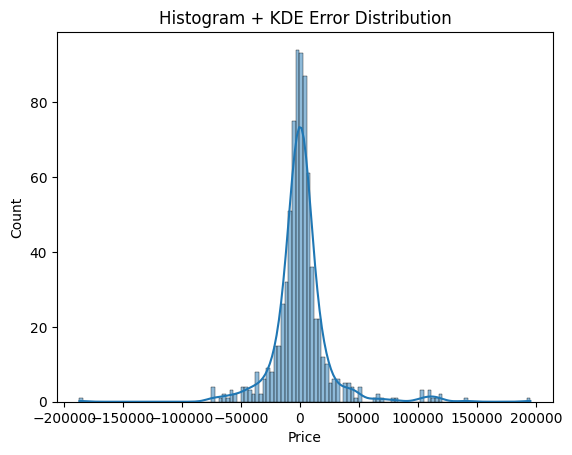

In [ ]:
errors = y_test_filtered - y_test_predict_filtered
skew_value = errors.skew()
print("Skew :", skew_value)

sns.histplot(errors, kde=True)
plt.title("Histogram + KDE Error Distribution")
plt.show()

#KS Test

In [ ]:
ks_stat, p_value = stats.ks_2samp(y_test_predict_filtered, y_test_filtered)
print("KS Statistic:", ks_stat)
print("P-Value:", p_value)

KS Statistic: 0.06013071895424837
P-Value: 0.1258116921092009


#Kesimpulan Dengan CatBoost
Evaluasi Metrik

Dilihat dari evaluasi Metrik model Catboost lebih stabil dibanding XGboost tidak overfitting, underfitting karena performa test hampir sama dengan train

Skew Data

Walaupun masih aman model terlihat positive skew sehingga model cenderung memprediksi lebih rendah dari harga sebenarnya

KS Test

Terlihat error atau residual mengikuti distribusi yang berarti distribusi prediksi dan actual mirip

# Hyperparameter Tuning Optuna

Menggunakan model catboost karena lebih baik performanya dibanding XGBoost

In [ ]:
def objective(trial):
    params = {
        "iterations": trial.suggest_int("iterations", 600, 2000), #Jumlah Tree
        "learning_rate": trial.suggest_float("learning_rate", 0.02, 0.07), #Kontribusi Tree
        "depth": trial.suggest_int("depth", 5, 8), #Kedalaman setiap tree
        "l2_leaf_reg": trial.suggest_float("l2_leaf_reg", 1, 5), #Daun Prediksi
        "loss_function": "MAE",
        "eval_metric": "MAE",
        "random_seed": 42,
        "task_type": "CPU",
        "verbose": False
    }

    model = CatBoostRegressor(**params)

    model.fit(train_pool_filtered, eval_set=valid_pool_filtered, verbose=False)

    preds = model.predict(valid_pool_filtered)
    mae = mean_absolute_error(y_test_filtered, preds)

    return mae

In [ ]:
#Studi Optuna
study = optuna.create_study(direction='minimize') #Minimalisasi MAE
study.optimize(objective, n_trials=100) #berapakali pengulangan

[I 2025-12-01 15:26:40,808] A new study created in memory with name: no-name-3bf55a78-f6ab-4728-a4fd-6f87c6d24f2f
[I 2025-12-01 15:26:47,369] Trial 0 finished with value: 14065.849027917811 and parameters: {'iterations': 1135, 'learning_rate': 0.04936567894963232, 'depth': 5, 'l2_leaf_reg': 4.345395484489412}. Best is trial 0 with value: 14065.849027917811.
[I 2025-12-01 15:27:01,635] Trial 1 finished with value: 13537.326115297954 and parameters: {'iterations': 1254, 'learning_rate': 0.05077717717984058, 'depth': 8, 'l2_leaf_reg': 3.209298566176756}. Best is trial 1 with value: 13537.326115297954.
[I 2025-12-01 15:27:15,384] Trial 2 finished with value: 13587.332637387244 and parameters: {'iterations': 1738, 'learning_rate': 0.05207043114278434, 'depth': 7, 'l2_leaf_reg': 3.8766883264906604}. Best is trial 1 with value: 13537.326115297954.
[I 2025-12-01 15:27:19,460] Trial 3 finished with value: 13826.016867725979 and parameters: {'iterations': 815, 'learning_rate': 0.0467682673896441

In [ ]:
#Mendapatkan best pada trial ke berapa
trial = study.best_trial
trial

FrozenTrial(number=38, state=<TrialState.COMPLETE: 1>, values=[13290.306416012607], datetime_start=datetime.datetime(2025, 12, 1, 15, 34, 15, 171916), datetime_complete=datetime.datetime(2025, 12, 1, 15, 34, 26, 956058), params={'iterations': 1914, 'learning_rate': 0.03578438471202232, 'depth': 6, 'l2_leaf_reg': 4.012091086936028}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'iterations': IntDistribution(high=2000, log=False, low=600, step=1), 'learning_rate': FloatDistribution(high=0.07, log=False, low=0.02, step=None), 'depth': IntDistribution(high=8, log=False, low=5, step=1), 'l2_leaf_reg': FloatDistribution(high=5.0, log=False, low=1.0, step=None)}, trial_id=38, value=None)

In [ ]:
#Get best params from best trial
best_params = trial.params
best_params

{'iterations': 1914,
 'learning_rate': 0.03578438471202232,
 'depth': 6,
 'l2_leaf_reg': 4.012091086936028}

In [ ]:
#Membuat model dengan hyperparameter tuning terbaik
final_model = CatBoostRegressor(**best_params,
                                loss_function="MAE",
                                eval_metric="MAE",
                                random_seed=42,
                                verbose=False)
final_model.fit(train_pool_filtered, eval_set=valid_pool_filtered)


# Prediksi data test

dari parameter yang sudah di hyperparameter

In [ ]:
y_pred_tuned = final_model.predict(X_test_filtered)

In [ ]:
df_pred = pd.DataFrame({
    "y_true": y_test_filtered.values,
    "y_pred_base": y_pred_tuned
})

df_pred.head(10)

,y_true,y_pred_base
0,49000.0,103583.830686
1,35000.0,18389.650607
2,45000.0,42863.203535
3,117000.0,113427.012534
4,20000.0,32739.531600
5,105000.0,99837.884185
6,30000.0,48386.890539
7,18000.0,18545.249029
8,70000.0,67324.625955
9,120000.0,124280.527103


# Final Evaluasi

In [ ]:
# --- Evaluasi akhir ---
mae_final = mean_absolute_error(y_test_filtered, y_pred_tuned)
mse_final = mean_squared_error(y_test_filtered, y_pred_tuned)
r2_final = r2_score(y_test_filtered, y_pred_tuned)
rmse_final = np.sqrt(mean_squared_error(y_test_filtered, y_pred_tuned))
print(f"MAE = {mae_final}")
print(f"MSE = {mse_final}")
print(f"r2 = {r2_final}")
print(f"rmse = {rmse_final}")

MAE = 13290.306416012607
MSE = 564788944.771944
r2 = 0.886348399626586
rmse = 23765.288653242653


# Model Performance Comparison

| Metric   | XGBoost        | CatBoost       | Hyperparameter Tuned | CatBoost vs XGBoost | Tuned vs CatBoost |
| -------- | -------------- | -------------- | -------------------- | ------------------- | ----------------- |
| **MAE**  | 14,584.32      | 13,667.35      | 13,290.31            | **-6.3%**           | **-2.8%**         |
| **MSE**  | 616,757,496.19 | 601,884,014.54 | 564,788,944.77       | **-2.4%**           | **-6.2%**         |
| **RMSE** | 24,834.60      | 24,533.32      | 23,765.29            | **-1.2%**           | **-3.1%**         |
| **R²**   | 0.8759         | 0.8789         | 0.8863               | **+0.3%**           | **+0.8%**         |


# Conclusion and Recomendation


Conclusion

Model yang sudah di hyperparameter tuned bisa dipakai model utama karena memberi peningkatan paling besar dalam akurasi dan stabilitas prediksi namun dalam evaluasi metrik yang sudah dilakukan untuk prediksi masih sedikit jauh dari harga aslinya, sehingga model masih harus di tingkatkan

Recommendation
1. Menambahkan data lebih banyak agar model lebih stabil
2. Menambahkan feature dan feature engineering dari feature yang berpengaruh terhadap model
3. Menambahkan segmentasi pada feature yang berpengaruh terhadap model
4. Mengurangi Noise data terutapa data outlier yang ekstrem